#### Import packages

In [1]:
! pip install plotly

In [2]:
import pandas as pd
import numpy as np
import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns


#### Load Data

In [3]:
data = pd.read_csv("..\data\data_work.csv",
                          sep=',', delimiter=None)

In [4]:
data.head()

,Unnamed: 0,year,player,position_in_team,age,team,games_played,games_started,mins_played,player_efficience_rating,...,fouls,points,player_id,year_start,year_end,position,height,weight,birth_date,college
0,1,1986,A.C. Green,PF,22.0,LAL,82,1.0,1542.0,11.8,...,229,521,A.C. Green 1,1986.0,2001.0,F-C,6-9,220.0,"October 4, 1963",Oregon State University
1,2,1987,A.C. Green,PF,23.0,LAL,79,72.0,2240.0,15.7,...,171,852,A.C. Green 1,1986.0,2001.0,F-C,6-9,220.0,"October 4, 1963",Oregon State University
2,3,1988,A.C. Green,PF,24.0,LAL,82,64.0,2636.0,14.5,...,204,937,A.C. Green 1,1986.0,2001.0,F-C,6-9,220.0,"October 4, 1963",Oregon State University
3,4,1989,A.C. Green,PF,25.0,LAL,82,82.0,2510.0,17.8,...,172,1088,A.C. Green 1,1986.0,2001.0,F-C,6-9,220.0,"October 4, 1963",Oregon State University
4,5,1990,A.C. Green,PF,26.0,LAL,82,82.0,2709.0,14.7,...,207,1061,A.C. Green 1,1986.0,2001.0,F-C,6-9,220.0,"October 4, 1963",Oregon State University


### EDA

#### Answer Basic Question About The Data

In [5]:
number_of_observations = data['player_id'].count() # len(data.index)  These are interchangeable''
number_of_columns = len(data.columns)

'The number of observations in our dataset is {} and it has {} columns.'.format(number_of_observations, number_of_columns)

'The number of observations in our dataset is 24636 and it has 59 columns.'

In [6]:
data.dtypes

Unnamed: 0                       int64
year                             int64
player                          object
position_in_team                object
age                            float64
team                            object
games_played                     int64
games_started                  float64
mins_played                    float64
player_efficience_rating       float64
perc_true_shooting             float64
rate_3_point                   float64
rate_free_throw                float64
perc_off_rebound               float64
perc_def_rebound               float64
perc_tot_rebound               float64
perc_assist                    float64
perc_steal                     float64
perc_block                     float64
perc_trunover                  float64
perc_usage                     float64
win_share_off                  float64
win_share_def                  float64
win_share                      float64
win_share_per_48               float64
plus_minus_box_off       

In [7]:
data.describe()

,Unnamed: 0,year,age,games_played,games_started,mins_played,player_efficience_rating,perc_true_shooting,rate_3_point,rate_free_throw,...,rebounds,assists,steals,blocks,turnovers,fouls,points,year_start,year_end,weight
count,24636.000000,24636.000000,24628.000000,24636.000000,18235.000000,24150.000000,24113.000000,24550.000000,18841.000000,24537.000000,...,24324.000000,24636.000000,20803.000000,20803.000000,19647.000000,24636.000000,24636.000000,24394.000000,24394.000000,24389.000000
mean,12318.500000,1992.588570,26.664812,50.843440,23.590787,1210.066957,12.479886,0.493004,0.158603,0.325439,...,224.624445,114.899618,39.895928,24.466471,73.932509,116.378836,510.243140,1988.347626,1996.664877,212.331174
std,7111.944952,17.431213,3.841777,26.497281,28.631883,941.336357,6.038863,0.094449,0.187486,0.219094,...,228.146698,135.870677,38.710475,36.930686,67.714249,84.819435,492.935045,17.125897,17.814915,26.479191
min,1.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1947.000000,1947.000000,133.000000
25%,6159.750000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000,1977.000000,1984.000000,190.000000
50%,12318.500000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000,1991.000000,2001.000000,210.000000
75%,18477.250000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,322.000000,160.000000,60.000000,29.000000,112.000000,183.000000,779.000000,2002.000000,2012.000000,230.000000
max,24636.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000,2017.000000,2018.000000,360.000000


##### We can easily tell number of observations and get some basic characteristics with the above used functions. describe() works for numerical variables only

In [8]:
players_per_season = data.groupby('year').count()[['player_id']]
players_per_season['year'] = players_per_season.index.values

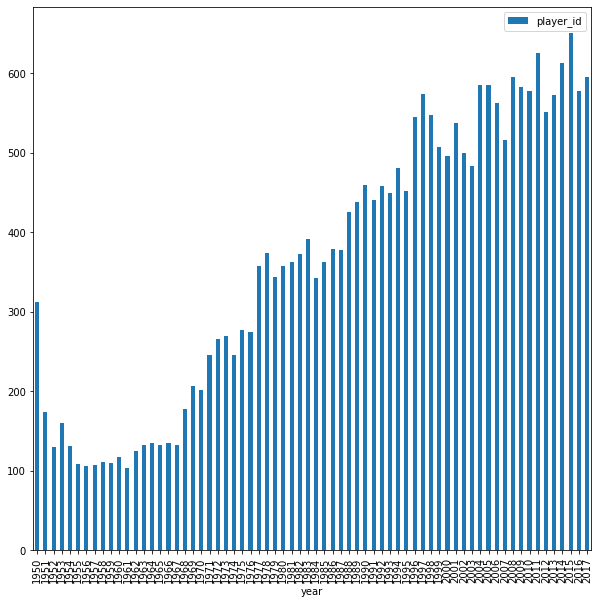

In [9]:
players_per_season.plot.bar(x = 'year', y = 'player_id', figsize = (10,10))

In [10]:
max_player_year = int(players_per_season[players_per_season['player_id'] == players_per_season['player_id'].max()]['year'])
max_player = int(players_per_season[players_per_season['player_id'] == players_per_season['player_id'].max()]['player_id'])
min_player_year = int(players_per_season[players_per_season['player_id'] == players_per_season['player_id'].min()]['year'])
min_player = int(players_per_season[players_per_season['player_id'] == players_per_season['player_id'].min()]['player_id'])

'The max number of players in a season is {} in {} \
and the min is {} in {} according to our data.'.format(max_player, max_player_year, min_player, min_player_year)

'The max number of players in a season is 651 in 2015 and the min is 104 in 1961 according to our data.'

##### Number of players can be analized by plotting them over the years e.g.

#### Let's do some analysis on the 'Points' that the players scored as our target variable

In [11]:
all_time_points = data['points'].sum()

In [15]:
avg_points_per_season = data.groupby('year').mean()[['points']]
avg_points_per_season['year'] = avg_points_per_season.index.values

In [16]:
points_per_season = data.groupby('year').sum()[['points']]
points_per_season['year'] = points_per_season.index.values

In [17]:
max_points = avg_points_per_season.loc[avg_points_per_season['points'].idxmax()]['points']
max_points_year = avg_points_per_season.loc[avg_points_per_season['points'].idxmax()]['year']
min_points = avg_points_per_season.loc[avg_points_per_season['points'].idxmin()]['points']
min_points_year = avg_points_per_season.loc[avg_points_per_season['points'].idxmin()]['year']

'Altogether, there were {} points scored all time in the NBA. \
The highest average points in a season is {} in {} \
and the lowest is {} in {} according to our data.'.format(all_time_points, round(max_points),
                                                       max_points_year, round(min_points), min_points_year)

'Altogether, there were 12570350 points scored all time in the NBA. The highest average points in a season is 735.0 in 1967.0 and the lowest is 277.0 in 1999.0 according to our data.'

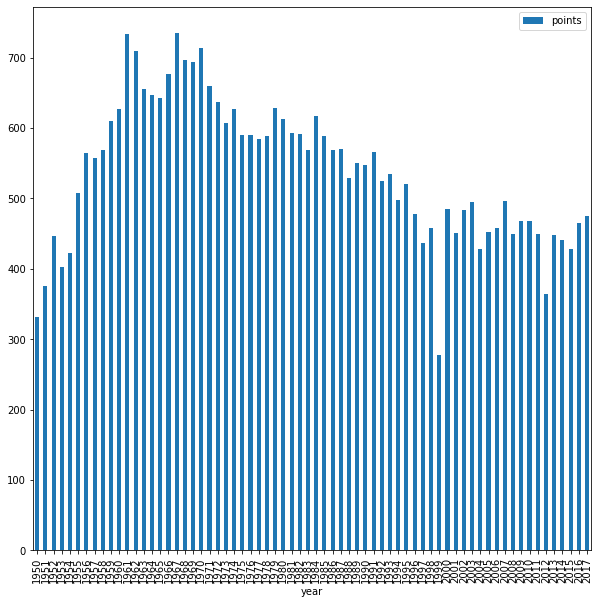

In [20]:
avg_points_per_season_plot = avg_points_per_season.plot.bar(x = 'year', y = 'points', figsize = (10, 10))

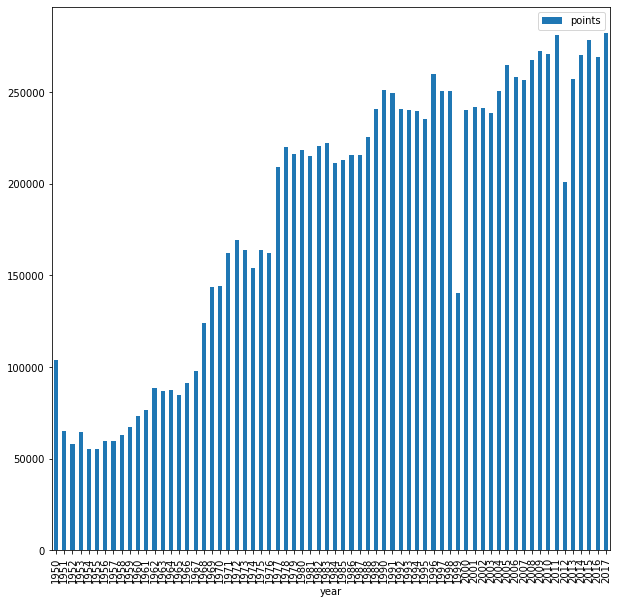

In [21]:
points_per_season_plot = points_per_season.plot.bar(x = 'year', y = 'points', figsize = (10, 10))

In [22]:
data['points'].describe()

count    24636.000000
mean       510.243140
std        492.935045
min          0.000000
25%        106.000000
50%        364.000000
75%        779.000000
max       4029.000000
Name: points, dtype: float64

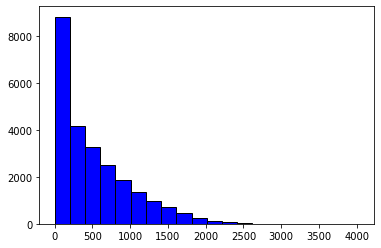

In [23]:
points_hist =plt.hist(data['points'], color = 'blue', edgecolor = 'black',
         bins = 20)

### Other Numerical Distributions

In [24]:
data.describe()

,Unnamed: 0,year,age,games_played,games_started,mins_played,player_efficience_rating,perc_true_shooting,rate_3_point,rate_free_throw,...,rebounds,assists,steals,blocks,turnovers,fouls,points,year_start,year_end,weight
count,24636.000000,24636.000000,24628.000000,24636.000000,18235.000000,24150.000000,24113.000000,24550.000000,18841.000000,24537.000000,...,24324.000000,24636.000000,20803.000000,20803.000000,19647.000000,24636.000000,24636.000000,24394.000000,24394.000000,24389.000000
mean,12318.500000,1992.588570,26.664812,50.843440,23.590787,1210.066957,12.479886,0.493004,0.158603,0.325439,...,224.624445,114.899618,39.895928,24.466471,73.932509,116.378836,510.243140,1988.347626,1996.664877,212.331174
std,7111.944952,17.431213,3.841777,26.497281,28.631883,941.336357,6.038863,0.094449,0.187486,0.219094,...,228.146698,135.870677,38.710475,36.930686,67.714249,84.819435,492.935045,17.125897,17.814915,26.479191
min,1.000000,1950.000000,18.000000,1.000000,0.000000,0.000000,-90.600000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1947.000000,1947.000000,133.000000
25%,6159.750000,1981.000000,24.000000,27.000000,0.000000,340.000000,9.800000,0.458000,0.005000,0.208000,...,51.000000,19.000000,9.000000,3.000000,18.000000,39.000000,106.000000,1977.000000,1984.000000,190.000000
50%,12318.500000,1996.000000,26.000000,58.000000,8.000000,1053.000000,12.700000,0.506000,0.064000,0.296000,...,159.000000,68.000000,29.000000,11.000000,55.000000,109.000000,364.000000,1991.000000,2001.000000,210.000000
75%,18477.250000,2007.000000,29.000000,75.000000,45.000000,1971.000000,15.600000,0.544000,0.288000,0.400000,...,322.000000,160.000000,60.000000,29.000000,112.000000,183.000000,779.000000,2002.000000,2012.000000,230.000000
max,24636.000000,2017.000000,44.000000,88.000000,83.000000,3882.000000,129.100000,1.136000,1.000000,6.000000,...,2149.000000,1164.000000,301.000000,456.000000,464.000000,386.000000,4029.000000,2017.000000,2018.000000,360.000000


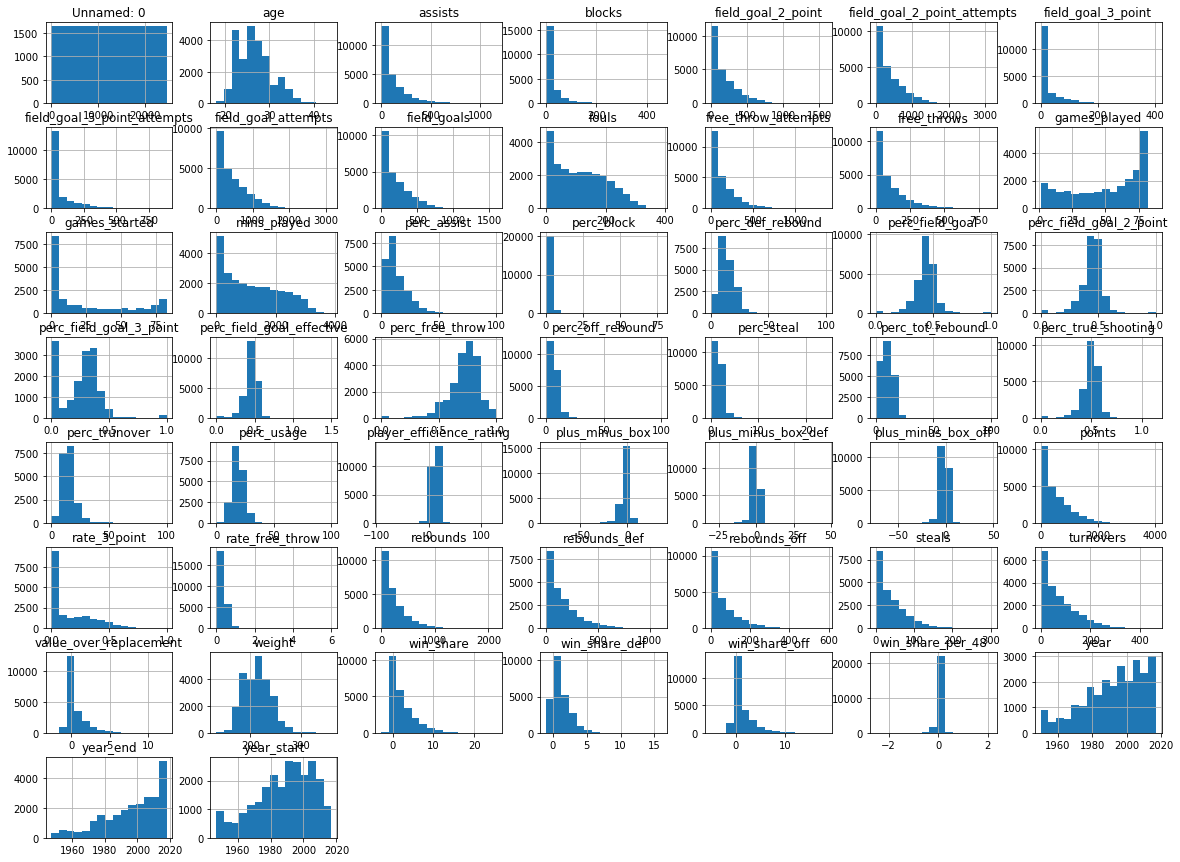

In [26]:
hist = data.hist(bins=15, figsize = (20,15))

In [ ]:
# SOME BASIC OBSERVATIONS ABOUT NUMERICAL DISTRIBUTIONS
# - There are no binary variables
# - Most variables seem to follow either a normal or a lognormal distribution
# - There doesn't seem to be any outliers. There are some extreme values, but those are important data points
# - The data seems to be correct without any measurement errors.


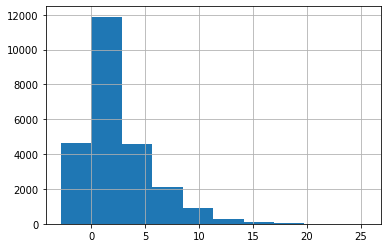

In [27]:
# Single columns can be plotted as well, if we want to look at them individually
data['win_share'].hist(bins = 10)

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not 0        LAL
1        LAL
2        LAL
3        LAL
4        LAL
        ... 
24631    CLE
24632    CLE
24633    CLE
24634    CLE
24635    MIA
Name: team, Length: 24636, dtype: object.

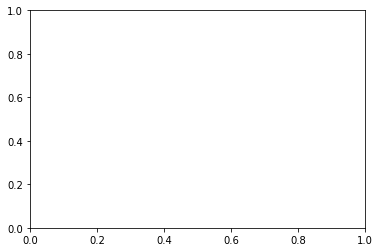

In [46]:
plt.scatter(data['games_played'], data['points'], c = data['team'])
# Creating a decade variable might make sense for these colored plots more


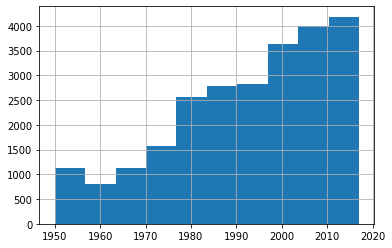

In [43]:
data['decade'] = data['year']
data['decade'].hist()

In [45]:
len(data['decade'].unique())

68